# Table of Contents:
    Business Prop
    Import Statements
    Organizing the Data
    EDA
    Data Cleaning
    Word Cloud
    TF-IDF
    Modeling
    FSM
    

# Business Prop:
Company A is stingy AF and doesn't want to mine their consumerbase for more data. THey want to squeeze every last delicious drop from the feedback they already receive. They have a review system in place that allows consumer to rate a place from one to five stars and leave a written review. As a way of getting more data out of this system they want hteir three star reviews disambiguated. Three star reviews create a problem by being notoriously flimsy in intent. Sometimes 3 stars is good, sometimes its bad, sometimes its just average. In an attempt to demystify these reviews company A would like a tool that will designate a review as positive or negative, no middle ground, no neutrals, no prisoners. 

In [6]:
import nltk
import random
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize
import json
nltk.download('punkt')
import csv
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from nltk.stem import PorterStemmer
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import StackingRegressor
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\edwardsrk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import sys
print(sys.maxsize)

9223372036854775807


# Organizing the Data

In [3]:
#raw_data_2 = pd.read_json('yelp_academic_dataset_review.json', lines = True)
#read in json file line by line as pandas data frame

In [1]:
#raw_data_2.head()
#raw_data_2.shape
#df_2 = raw_data_2[['text', 'stars']]
#subset data into working df of only usefull info, text and star rating

NameError: name 'raw_data_2' is not defined

In [5]:
#df_2.isna().sum()
#check for missing values
#none found

text     0
stars    0
dtype: int64

In [6]:
#df_2.head()
#all_five_star_2 = df_2[df_2['stars'] == 5]
#all_four_star_2 = df_2[df_2['stars'] == 4]
#all_three_star_2 = df_2[df_2['stars'] == 3]
#all_two_star_2 = df_2[df_2['stars'] == 2]
#all_one_star_2 = df_2[df_2['stars'] == 1]
#subset data further into categories based on star rating

In [8]:
#len(all_five_star_2), len(all_four_star_2), len(all_two_star_2), len(all_one_star_2), len(all_three_star_2)
#check length of each text subset

(3586460, 1673404, 635072, 1283897, 842289)

In [9]:
#five_raw_4500 = all_five_star_2.head(4500)
#four_raw_3000 = all_four_star_2.head(3000)
#two_raw_1000 =all_two_star_2.head(1000)
#one_raw_2000 = all_one_star_2.head(2000)
#get workable sized data sets with bias adjust for onestart and 5star

In [10]:
#dfs_2 = [four_raw_3000, five_raw_4500]
#pos_2 = pd.concat(dfs_2)
#concast four and five star for positive tagged set

In [11]:
#pos_2['stars'].unique()
#check split went well

array([4, 5], dtype=int64)

In [12]:
#dfss_2 = [one_raw_2000, two_raw_1000]
#neg_2 = pd.concat(dfss_2)
#concat 1 and two str for negative tagged set

In [13]:
#neg_2['stars'].unique()

array([1, 2], dtype=int64)

In [14]:
#neg['value'] = neg[(neg['stars'] == 1) | (neg['stars'] == 2), neg['value'] = 'neg']
#neg_list = []
#pos_list = []
#for i in range(0,len(neg)):
#    neg_list.append('neg')
#    pos_list.append('pos')
#use a for loop to create a list of lenght equal to 5000, lenght of eahc set of tagged data

In [ ]:
#neg_list_2 = []
#for i in range(0,len(neg_2)):
#    neg_list_2.append('neg')
#use a for loop to create a list of lenght equal to 5000, lenght of eahc set of tagged data

In [ ]:
#pos_list_2 = []
#for i in range(0,len(pos_2)):
#    pos_list_2.append('pos')

In [15]:
#len(neg_list_2)
#check doc length

5000

In [16]:
#neg_2['value'] = neg_list_2
#pos_2['value'] = pos_list_2
#add new column to df to represent data tag

In [17]:
#neg_2.head()

text  stars value
1   I am actually horrified this place is still in...      1   neg
3   Dismal, lukewarm, defrosted-tasting "TexMex" g...      1   neg
15  If I could give less than one star, that would...      1   neg
16  10pm on a super bowl Sunday and they're alread...      1   neg
18  Tried to have my car repaired.  Even made an a...      1   neg

In [18]:
#neg_raw_2 = neg_2.drop('stars', axis =1)
#pos_raw_2 = pos_2.drop('stars', axis =1)
#drop stars column as no longer useful 

In [19]:

#neg_raw_list_2 = neg_raw_2['text'].tolist()
#pos_raw_list_2 = pos_raw_2['text'].tolist()
#move data out of df and into list

In [21]:
#neg_list_1_2 = [review.replace('\n', '') for review in neg_raw_list_2]
#pos_list_1_2 = [review.replace('\n', '') for review in pos_raw_list_2]
#get rid of newline chars

In [88]:
["{}\n".format(review) for review in neg_list_1]

['I am actually horrified this place is still in business. My 3 year old son needed a haircut this past summer and the lure of the $7 kids cut signs got me in the door. We had to wait a few minutes as both stylists were working on people. The decor in this place is total garbage. It is so tacky. The sofa they had at the time was a pleather sofa with giant holes in it. And my son noticed ants crawling all over the floor and the furniture. It was disgusting and I should have walked out then. Actually, I should have turned around and walked out upon entering but I didn\'t. So the older black male stylist finishes the haircut he was doing and it\'s our turn. I tell him I want a #2 clipper around the back and sides and then hand cut the top into a standard boys cut. Really freaking simple, right? WRONG! Rather than use the clippers and go up to actually cut the hair, he went down. Using it moving downward doesn\'t cut hair, it just rubs against it. How does this man who has an alleged cosme

In [22]:
#with open('neg_raw_list_2.txt', 'w', encoding="utf-8") as filehandle:
#    filehandle.writelines("{}\n".format(review) for review in neg_list_1_2)
#open file to write processed data for negs

In [23]:
#with open('pos_raw_list_2.txt', 'w', encoding="utf-8") as filehandle:
#    filehandle.writelines("{}\n".format(review) for review in pos_list_1_2)
#open file to write processed data for pos

In [2]:
pos_7500 = open("C:/Users/edwardsrk/yelp_sentiment_analysis/pos_raw_list_2.txt","r", encoding="utf-8").read()
neg_3000 = open("C:/Users/edwardsrk/yelp_sentiment_analysis/neg_raw_list_2.txt","r", encoding="utf-8").read()
#read data in

In [3]:
pos_5k[0]

'O'

In [3]:
documents = []
pos_rev =[]
neg_rev = []

for r in pos_7500.split('\n'):
    documents.append( (r, "pos") )
    pos_rev.append( (r) )

for r in neg_3000.split('\n'):
    documents.append( (r, "neg") )
    neg_rev.append( (r) )
    
#split data on the newline and append to doc list with pos or neg tag

In [4]:
len(documents), len(neg_rev), len(pos_rev)

(10526, 3003, 7523)

## creating an 80/20 split between test and train data


In [26]:
#for doc in range(0, 4000):
#    
#    file = open("./train_neg/" + str(doc) + ".txt", "w") 
#    file.write(str(neg_rev[doc].encode("utf-8"))) 
#    file.close() 

In [28]:
#for doc in range(0, 4000):
#    
#    file = open("./train_pos/" + str(doc) + ".txt", "w") 
#    file.write(str(pos_rev[doc].encode("utf-8"))) 
#    file.close() 
    

In [29]:
#for doc in range(4000, 5001):
    
#    file = open("./test_pos/" + str(doc) + ".txt", "w") 
#    file.write(str(pos_rev[doc].encode("utf-8"))) 
#    file.close() 

In [30]:
#for doc in range(4000, 5001):
#    
#    file = open("./test_neg/" + str(doc) + ".txt", "w") 
#    file.write(str(neg_rev[doc].encode("utf-8"))) 
#    file.close() 

In [7]:
all_words_raw = []

pos_7500_words = word_tokenize(pos_7500)
neg_3000_words = word_tokenize(neg_3000)
#tokenize data

In [8]:
for w in pos_7500_words:
    all_words_raw.append(w)
print(len(all_words_raw))
    
for w in neg_3000_words:
    all_words_raw.append(w)
print(len(all_words_raw))

#append tokenized data to all_words_raw

810870
1263624


# EDA

In [9]:
print(len(all_words_raw))
#check length

1263624


In [10]:
tokens = all_words_raw
types = set(tokens)
len(types), len(tokens)

#create token and type vars

(41906, 1263624)

In [11]:
fdist1 = nltk.FreqDist(tokens)
fdist1
#create frequency distribution, checks all tokens and how often they occur in the vocab
#prints out top 10 most used

FreqDist({'.': 62120, 'the': 45055, 'and': 38503, ',': 37129, 'I': 31782, 'a': 27019, 'to': 26697, 'was': 20187, 'of': 15183, '!': 14956, ...})

In [12]:
fdist1.plot(25, cumulative = True)

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [14]:
fdist1.hapaxes()[:10]
#first ten unique words

['casa',
 'griping',
 'zips',
 'clotted',
 'ReviewI',
 'accommodating.Won',
 'Ton',
 'tons.Chicken',
 'Diced',
 'Cashews']

In [15]:
fdist1['the'], fdist1.freq('the')
#shows count of the word and frequency with which it appears

(45055, 0.03565538482966452)

In [16]:
words_lower = [w.lower() for w in all_words_raw]
#list comprehension for making all words lower case

In [17]:
len(words_lower)

1263624

In [18]:
words_npunc = [w for w in words_lower if w.isalpha()]
len(words_npunc)
# list comp for all words that are alpha numeric, no punctuation

1082114

In [19]:
fdist2 = nltk.FreqDist(words_npunc)
#check freq dist again

In [20]:
fdist2
#punctuation gone

FreqDist({'the': 54329, 'and': 39332, 'i': 32763, 'a': 27758, 'to': 26898, 'was': 20336, 'it': 15939, 'of': 15268, 'is': 13634, 'for': 13177, ...})

In [21]:
#from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#get a list of stop words from nltk

In [22]:
all_words_nstop = [w for w in words_npunc if not w in stop_words]
len(all_words_nstop)
#list comp to remove all stop words

538646

In [23]:
fdist3 = nltk.FreqDist(all_words_nstop)
fdist3
#thrid freqdist to check stopwords are gone

FreqDist({'food': 5316, 'place': 5001, 'good': 4895, 'great': 4523, 'service': 3788, 'time': 3417, 'would': 3412, 'like': 3349, 'one': 3315, 'get': 3311, ...})

In [24]:
neg_doc_lengths = []
pos_doc_lengths = []
for doc in neg_rev:
    neg_doc_lengths.append(len(doc))

for doc in pos_rev:
    pos_doc_lengths.append(len(doc))

In [25]:
n_bins = 20
fig, axs = plt.subplots(1, sharey=True, tight_layout=True)
axs.hist(neg_doc_lengths, bins=n_bins)

(array([596., 855., 553., 381., 202., 137.,  82.,  59.,  48.,  24.,  16.,
         15.,   8.,   4.,   6.,   3.,   4.,   5.,   0.,   5.]),
 array([   0.  ,  249.95,  499.9 ,  749.85,  999.8 , 1249.75, 1499.7 ,
        1749.65, 1999.6 , 2249.55, 2499.5 , 2749.45, 2999.4 , 3249.35,
        3499.3 , 3749.25, 3999.2 , 4249.15, 4499.1 , 4749.05, 4999.  ]),
 <BarContainer object of 20 artists>)

(array([2.497e+03, 2.371e+03, 1.144e+03, 6.310e+02, 3.490e+02, 2.100e+02,
        1.140e+02, 7.300e+01, 4.400e+01, 3.000e+01, 1.500e+01, 1.000e+01,
        1.000e+01, 6.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 9.000e+00]),
 array([   0. ,  249.3,  498.6,  747.9,  997.2, 1246.5, 1495.8, 1745.1,
        1994.4, 2243.7, 2493. , 2742.3, 2991.6, 3240.9, 3490.2, 3739.5,
        3988.8, 4238.1, 4487.4, 4736.7, 4986. ]),
 <BarContainer object of 20 artists>)

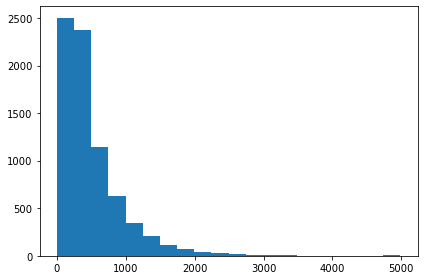

In [26]:
fig, axs = plt.subplots(1, sharey=True, tight_layout=True)
axs.hist(pos_doc_lengths, bins=n_bins)

# Data Cleaning

In [27]:
df = pd.DataFrame(documents, columns =['text', 'tag']) 
df.head()
df.shape
#read data into df with text as col1 and tag as col2

(10526, 2)

In [28]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
sw = stopwords.words('english')
def data_cleaner(doc, stop_words=sw):
    #rename to data cleaner
    '''
    
    :param doc: a document from the satire corpus 
    :return: a document string with words which have been 
            lemmatized, 
            parsed for stopwords, 
            made lowercase,
            and stripped of punctuation and numbers.
    '''
    
    regex_token = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")
    doc = regex_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in sw]
    print(doc)
    lemmatizer = WordNetLemmatizer() 
    return ' '.join([lemmatizer.lemmatize(w) for w in doc])

In [29]:
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer

In [31]:
sw = stopwords.words('english')
#add custom sopt words?
#custom_sw = stopwords.words('english')
#custom_sw.extend([words])
c_list = df.text.tolist()


clean_corpus = []
for doc in c_list:
    clean_corpus.append(data_cleaner(doc, sw))

['oh', 'happy', 'day', 'finally', 'canes', 'near', 'casa', 'yes', 'others', 'griping', 'drive', 'thru', 'packed', 'like', 'canes', 'area', 'like', 'go', 'sit', 'enjoy', 'chicken', 'cashiers', 'pleasant', 'far', 'food', 'wise', 'yet', 'receive', 'funky', 'chicken', 'clean', 'crew', 'zips', 'around', 'dining', 'area', 'constantly', 'usually', 'well', 'kept', 'gripe', 'one', 'fella', 'red', 'hair', 'makes', 'rounds', 'cleaning', 'smile', 'personality', 'nights', 'ago', 'tossed', 'napkins', 'put', 'table', 'help', 'go', 'meal', 'done', 'reached', 'tray', 'excuse', 'done', 'realize', 'trying', 'job', 'quickly', 'little', 'table', 'manners', 'goes', 'along', 'way', 'said', 'still', 'like', 'grub', 'glad', 'finally', 'cane', 'close']
['twice', 'nice', 'laid', 'back', 'tried', 'weekend', 'southern', 'menu', 'delicious', 'collard', 'greens', 'mac', 'cheese', 'ribs', 'bbq', 'chicken', 'sandwich', 'scone', 'clotted', 'cream', 'divine', 'iced', 'teas', 'refreshing', 'swear', 'drank', 'whole', 'con

['carryout', 'good', 'rigatoni', 'lasagna', 'meat', 'excellent', 'nice', 'way', 'bread', 'butter', 'included', 'without', 'ask', 'best', 'part', 'meal', 'lemon', 'cookies']
['tucson', 'happy', 'see', 'location', 'open', 'phoenix', 'big', 'fan', 'owner', 'even', 'came', 'table', 'see', 'enjoying', 'meals', 'go', 'hot', 'dogs']
['debated', 'going', 'stars', 'review', 'would', 'say', 'firecracker', 'shrimp', 'garlic', 'noodles', 'selection', 'fresh', 'spring', 'rolls', 'shaken', 'beef', 'deserve', 'pho', 'maybe', 'crispy', 'spring', 'rolls', 'probably', 'spring', 'rolls', 'great', 'selection', 'traditional', 'really', 'americanized', 'spring', 'rolls', 'nevertheless', 'spring', 'rolls', 'great', 'grandmothers', 'vietnamese', 'restaurant', 'owning', 'relatives', 'probably', 'recognize', 'half', 'spring', 'rolls', 'sell', 'tasty', 'favorites', 'spicy', 'asian', 'chinese', 'sausage', 'imitation', 'crab', 'sriracha', 'jalapeno', 'sort', 'crunchy', 'stick', 'enlighten', 'one', 'vegetarian', 'p

['awesome', 'place', 'near', 'house', 'great', 'find', 'great', 'food', 'definitely', 'back', 'visit', 'great', 'staff', 'courtious']
['good', 'straightforward', 'fast', 'friendly', 'gave', 'star', 'honor', 'smog', 'check', 'advertised', 'price', 'go', 'back', 'corollas']
['target', 'place', 'accross', 'street', 'let', 'lured', 'construction', 'looed', 'complete', 'please', 'open']
['bit', 'cluster', 'getting', 'table', 'overall', 'good', 'food', 'service', 'pretty', 'restaurant', 'music', 'loud', 'side', 'making', 'little', 'difficult', 'hear', 'sure', 'loud', 'restaurant', 'busy', 'sat']
['shellac', 'manicure', 'regular', 'pedicure', 'jessica', 'c', 'well', 'spoken', 'english', 'great', 'job', 'salon', 'clean', 'wide', 'range', 'services', 'little', 'pricey', 'side', 'since', 'typically', 'go', 'city', 'services', 'reasonable', 'downtown', 'alternative', 'return']
['love', 'love', 'love', 'took', 'friend', 'birthday', 'food', 'amazing', 'drinks', 'fantastic', 'try', 'spicy', 'margari

['dinner', 'saturday', 'night', 'got', 'bit', 'early', 'place', 'starting', 'fill', 'decor', 'ambiance', 'tip', 'top', 'menu', 'unique', 'eclectic', 'mix', 'asian', 'dishes', 'started', 'two', 'sets', 'dumplings', 'smoked', 'pig', 'face', 'smoked', 'bok', 'choy', 'delicious', 'pig', 'definitely', 'moist', 'fatty', 'dark', 'meat', 'love', 'perhaps', 'bok', 'choy', 'turned', 'flavorful', 'lots', 'spice', 'well', 'mix', 'entrees', 'scallop', 'special', 'scallops', 'well', 'done', 'mission', 'chinese', 'kung', 'pao', 'pastrami', 'spicy', 'delectable', 'kimchi', 'fried', 'rice', 'bit', 'salty', 'well', 'done', 'roasted', 'pork', 'noodles', 'tasty', 'think', 'thing', 'lacking', 'service', 'started', 'good', 'went', 'downhill', 'fast', 'said', 'chalk', 'place', 'brand', 'new', 'dined', 'n', 'joy']
['third', 'time', 'visiting', 'restaurant', 'food', 'delicious', 'particularly', 'apps', 'tip', 'try', 'spinach', 'dip', 'great', 'place', 'large', 'group', 'vegitarian', 'friendly', 'nice', 'ambien

['come', 'mood', 'fast', 'food', 'seemingly', 'pretty', 'healthy', 'usually', 'order', 'thing', 'chicken', 'bowl', 'get', 'brown', 'rice', 'usually', 'brown', 'rice', 'general', 'grainier', 'white', 'rice', 'however', 'never', 'really', 'notice', 'chipotle', 'plus', 'chicken', 'bit', 'charred', 'dry', 'sometimes', 'normally', 'problem', 'also', 'get', 'fajita', 'veggies', 'however', 'veggies', 'hit', 'miss', 'normally', 'like', 'veggies', 'saut', 'ed', 'side', 'sometimes', 'crunchy', 'raw', 'taste', 'love', 'corn', 'salsa', 'tell', 'person', 'like', 'stuff', 'bowl', 'notice', 'location', 'tend', 'give', 'little', 'smaller', 'portion', 'locations']
['favourite', 'store', 'easy', 'find', 'nice', 'case', 'phone', 'anyone', 'help', 'cashier', 'lady', 'nice', 'gave', 'directions', 'starbucks']
['one', 'best', 'restaurants', 'town', 'came', 'anniversary', 'every', 'member', 'management', 'came', 'table', 'express', 'congrats', 'beautiful', 'atmosphere', 'great', 'wine', 'beer', 'list', 'food

['brunch', 'saturday', 'excellent', 'bloody', 'marys', 'delicious', 'meals', 'french', 'toast', 'w', 'procuitto', 'figs', 'feta', 'biscuits', 'gravy', 'great', 'decor', 'great', 'service', 'eclectic', 'menu', 'come', 'back', 'dinner']
['heard', 'terrible', 'reviews', 'place', 'decided', 'give', 'try', 'anyway', 'boy', 'pleasantly', 'surprised', 'amazing', 'food', 'service', 'well', 'even', 'went', 'back', 'days', 'later', 'fall', 'employees', 'would', 'congregate', 'bar', 'area', 'goof', 'really', 'inappropriate', 'advice', 'notify', 'management', 'see', 'behavior', 'finally', 'understand', 'main', 'reason', 'bad', 'rep']
['place', 'usual', 'ramen', 'restaurant', 'get', 'line', 'order', 'ramen', 'get', 'tracker', 'buzz', 'food', 'ready', 'food', 'tasty', 'service', 'great', 'pricey', 'seating', 'area', 'quite', 'spacious']
['placed', 'order', 'delivery', 'tonight', 'calzone', 'outstanding', 'fettuccine', 'pretty', 'marginal', 'big', 'problem', 'quoted', 'delivery', 'time', 'minutes', '

['great', 'ice', 'cream', 'fun', 'place', 'near', 'old', 'port', 'square', 'get', 'ice', 'cream', 'four', 'different', 'flavors', 'enjoyed', 'employees', 'efficient', 'overly', 'friendly', 'possible', 'language', 'barrier', 'ate', 'outside', 'enjoyable', 'way', 'end', 'arrival', 'day', 'montreal']
['place', 'great', 'little', 'bit', 'quiet', 'restaurant', 'staff', 'super', 'nice', 'food', 'delicious', 'prices', 'great', 'get', 'much', 'food', 'paying']
['fantastic', 'experience', 'celebrated', 'birthday', 'yesterday', 'found', 'place', 'yelp', 'staff', 'super', 'friendly', 'food', 'filled', 'flavour', 'impressed', 'think', 'found', 'new', 'thai', 'restaurant']
['bf', 'went', 'vegas', 'birthday', 'looking', 'spend', 'ton', 'money', 'plaza', 'great', 'deal', 'like', 'night', 'wanted', 'money', 'gamble', 'stayed', 'weary', 'reviews', 'read', 'actually', 'surprised', 'got', 'yes', 'place', 'old', 'arguing', 'duct', 'tape', 'carpet', 'third', 'floor', 'replaced', 'however', 'plan', 'sleep',

['tops', 'oddball', 'little', 'neighbourhood', 'dive', 'bar', 'sports', 'bar', 'would', 'happy', 'call', 'local', 'watering', 'hole', 'cont', 'first', 'far', 'pizza', 'goes', 'tops', 'total', 'champions', 'super', 'heavy', 'yet', 'greasy', 'loaded', 'hell', 'tasty', 'toppings', 'tops', 'pizza', 'right', 'got', 'new', 'yorker', 'half', 'halfed', 'spartan', 'pizza', 'steak', 'bites', 'mushrooms', 'green', 'pepper', 'onions', 'bacon', 'stripes', 'sic', 'actia', 'u', 'tonne', 'spelling', 'mistakes', 'menu', 'yycist', 'would', 'hayday', 'meets', 'donair', 'meat', 'banana', 'peppers', 'unruly', 'delicious', 'also', 'close', 'xl', 'worth', 'yeah', 'leftovers', 'start', 'getting', 'north', 'happens', 'unfortunately', 'bars', 'get', 'away', 'better', 'hope', 'live', 'next', 'fits', 'bar', 'fits', 'know', 'could', 'live', 'lifestyle', 'involve', 'close', 'home', 'spot', 'drink', 'eat', 'befriend', 'drinkin', 'eatin', 'locals', 'even', 'want', 'entertain', 'possibility', 'say', 'sports', 'bar', '

['loved', 'place', 'first', 'drink', 'delicious', 'ordered', 'bellini', 'definitely', 'one', 'best', 'ever', 'kind', 'fizzy', 'good', 'bread', 'butter', 'hot', 'delicious', 'love', 'field', 'salad', 'okay', 'love', 'steak', 'french', 'fries', 'asked', 'wanted', 'steak', 'prepared', 'said', 'medium', 'waiter', 'suggested', 'medium', 'rare', 'since', 'thin', 'hanger', 'steak', 'glad', 'suggested', 'perfectly', 'cooked', 'would', 'love', 'try', 'dessert', 'one', 'day', 'looks', 'delicious', 'well']
['honestly', 'state', 'pre', 'installation', 'process', 'bit', 'disorganized', 'buti', 'recently', 'paradigm', 'luxury', 'vinyl', 'plank', 'flooring', 'new', 'mouldings', 'installed', 'saturday', 'march', 'spoke', 'marshall', 'obtaining', 'best', 'installation', 'team', 'since', 'quite', 'hard', 'please', 'well', 'installation', 'went', 'flawlessly', 'attitude', 'listened', 'intently', 'fantastic', 'clean', 'every', 'piece', 'plank', 'moulding', 'meticulously', 'placed', 'quality', 'installatio

['years', 'really', 'enjoyed', 'staying', 'staff', 'great', 'always', 'help', 'smiling', 'faces', 'location', 'great', 'quiet', 'neighborhood', 'pool', 'amazing', 'clean', 'maintenance', 'requests', 'taken', 'care', 'day']
['great', 'show', 'fun', 'show', 'truly', 'interactive', 'definitely', 'adults', 'get', 'offended', 'easily', 'go', 'definitely', 'bargain', 'great', 'time', 'far', 'seating', 'would', 'definitely', 'towards', 'front', 'better', 'view', 'lot', 'fun', 'see', 'everything', 'close', 'grab', 'drink', 'fun', 'time']
['place', 'real', 'deal', 'everything', 'super', 'fresh', 'tasty', 'server', 'also', 'knowledgeable', 'menu', 'ingredients', 'chefs', 'dishes']
['years', 'trying', 'go', 'unsuccessfully', 'alone', 'short', 'sale', 'referred', 'xenophone', 'real', 'estate', 'agent', 'grateful', 'found', 'first', 'met', 'xenophone', 'spent', 'hour', 'answering', 'every', 'question', 'first', 'meeting', 'arrived', 'xenophone', 'already', 'reviewed', 'file', 'recommended', 'course

['located', 'old', 'henderson', 'pho', 'king', 'phonomenal', 'look', 'like', 'much', 'outside', 'let', 'stop', 'visiting', 'best', 'new', 'thai', 'fusion', 'restaurant', 'town', 'fun', 'afternoon', 'day', 'drinking', 'boyfriend', 'decided', 'needed', 'fill', 'bellies', 'delicious', 'pho', 'drunken', 'noodles', 'wanting', 'try', 'place', 'yelp', 'reviews', 'disappoint', 'greeted', 'owner', 'friendly', 'order', 'taker', 'leslie', 'sad', 'find', 'run', 'broth', 'pho', 'also', 'drunk', 'af', 'noodles', 'however', 'turned', 'blessing', 'disguise', 'ended', 'trying', 'variety', 'equally', 'delicious', 'foods', 'first', 'ordered', 'big', 'wang', 'awesome', 'came', 'huge', 'baguette', 'loaded', 'strips', 'tender', 'beef', 'cucumbers', 'spicy', 'spicy', 'wang', 'sauce', 'asian', 'slaw', 'side', 'note', 'big', 'wang', 'listed', 'top', 'best', 'sandwiches', 'must', 'try', 'nevada', 'see', 'seriously', 'wanted', 'try', 'bang', 'bang', 'sliders', 'figured', 'would', 'little', 'appetizer', 'sized', 

['switched', 'crah', 'september', 'rescued', 'rd', 'boxer', 'paying', 'opinion', 'extortionate', 'fees', 'another', 'vets', 'office', 'first', 'moment', 'stepped', 'office', 'greeted', 'friendly', 'receptionists', 'diligent', 'went', 'comes', 'dogs', 'first', 'visit', 'secretly', 'interview', 'see', 'vets', 'would', 'deemed', 'fit', 'take', 'care', 'precious', 'boxers', 'kidding', 'either', 'first', 'appointment', 'left', 'feeling', 'incredibly', 'comfortable', 'new', 'choice', 'veterinary', 'care', 'boxers', 'means', 'frequently', 'seen', 'pretty', 'much', 'vets', 'know', 'dogs', 'well', 'staff', 'greet', 'us', 'names', 'huge', 'smile', 'sadly', 'dire', 'medical', 'conditions', 'even', 'one', 'senior', 'boys', 'suffering', 'cancer', 'put', 'sleep', 'throughout', 'whole', 'month', 'process', 'feel', 'though', 'treated', 'respect', 'love', 'definitely', 'shoulder', 'support', 'would', 'arrive', 'appointments', 'every', 'time', 'tears', 'everyone', 'unbelievably', 'nice', 'kind', 'offer'

['good', 'customer', 'service', 'trouble', 'w', 'mac', 'book', 'pro', 'new', 'os', 'installed', 'took', 'first', 'store', 'mgr', 'amazing', 'went', 'way', 'make', 'sure', 'left', 'happy', 'go', 'apple', 'store']
['car', 'taken', 'ultimate', 'collision', 'repair', 'rear', 'ended', 'freeway', 'went', 'meet', 'dennis', 'blown', 'away', 'clean', 'worried', 'using', 'genuine', 'bmw', 'parts', 'explained', 'entire', 'process', 'addressed', 'concern', 'may', 'dennis', 'fantastic', 'keeping', 'loop', 'throughout', 'entire', 'repair', 'got', 'car', 'back', 'looks', 'like', 'new', 'thrilled', 'quality', 'service', 'highly', 'recommend', 'dennis', 'ultimate', 'collision', 'repair', 'pyle', 'road']
['every', 'part', 'excellent', 'food', 'fantastic', 'even', 'got', 'dessert', 'byow', 'convenient', 'andre', 'waiter', 'absolute', 'professional', 'made', 'much', 'better']
['absolutely', 'love', 'place', 'atmosphere', 'people', 'classes', 'vibe', 'first', 'came', 'months', 'ago', 'boyfriend', 'tried', 

['known', 'place', 'lil', 'good', 'friend', 'sara', 'tried', 'go', 'unfortunately', 'found', 'closed', 'well', 'finally', 'went', 'back', 'today', 'one', 'loveliest', 'places', 'ever', 'city', 'plateau', 'many', 'gems', 'definitely', 'one', 'stands', 'cafe', 'little', 'building', 'well', 'house', 'converted', 'cafe', 'decoration', 'mix', 'vintage', 'eclectic', 'style', 'tr', 'mon', 'go', 'many', 'different', 'sitting', 'areas', 'way', 'back', 'theres', 'magical', 'garden', 'yes', 'magical', 'filled', 'green', 'vegetations', 'trees', 'even', 'little', 'pond', 'place', 'summer', 'time', 'course', 'could', 'spend', 'mornings', 'afternoons', 'evenings', 'day', 'errrydayyy', 'reading', 'book', 'enjoying', 'nature', 'delighting', 'philosophical', 'convo', 'life', 'little', 'magical', 'place', 'even', 'lits', 'night', 'resemble', 'fairy', 'den', 'imagine', 'fairy', 'den', 'would', 'look', 'like', 'existed', 'unfortunately', 'eat', 'meals', 'drink', 'ice', 'cream', 'iced', 'coffee', 'late', 'h

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['negative', 'rating', 'choose', 'place', 'came', 'place', 'group', 'finished', 'disappointed', 'dinner', 'asked', 'waiter', 'bill', 'add', 'tips', 'top', 'without', 'notify', 'us', 'tiped', 'left', 'restaurant', 'one', 'friend', 'figured', 'number', 'right', 'asked', 'waiter', 'receipt', 'told', 'us', 'sorry', 'receipt', 'anymore', 'guys', 'paid', 'asked', 'bill', 'add', 'tips', 'already', 'waiter', 'willing', 'response', 'told', 'us', 'know', 'walked', 'away', 'shame', 'bad', 'experience', 'cheap', 'price', 'come', 'consequences', 'cheap', 'quality', 'broth', 'food', 'especially', 'famous', 'lamb', 'slices', 'bad', 'services', 'unethical', 'business', 'conduct', 'come', 'back', 'agian']
['food', 'ok', 'happy', 'service', 'waitresses', 'name', 'rihanna', 'something', 'rude', 'got', 'order', 'wrong', 'seem', 'care', 'suspect', 'spit', 'sauce']
['explain', 'need', 'pay', 'parking', 'enough', 'spots', 'enforce', 'parking', 'handicap', 'guest', 'us', 'handicap', 'spots', 'available', 'no

['ever', 'take', 'car', 'went', 'location', 'told', 'phone', 'brake', 'special', 'services', 'lie', 'take', 'car', 'next', 'day', 'waiting', 'overheard', 'customer', 'telling', 'men', 'front', 'desk', 'brand', 'new', 'brakes', 'purchased', 'installed', 'meineke', 'grinding', 'making', 'awful', 'noise', 'left', 'considering', 'needed', 'brake', 'service', 'made', 'mistake', 'staying', 'car', 'looked', 'one', 'mechanics', 'calls', 'boyfriend', 'outside', 'tell', 'us', 'quote', 'see', 'quote', 'brakes', 'one', 'rotor', 'costs', 'nearly', 'beyond', 'quote', 'worst', 'part', 'clearly', 'disagree', 'charges', 'opt', 'take', 'vehicle', 'somewhere', 'else', 'man', 'proceeds', 'tell', 'allow', 'drive', 'vehicle', 'away', 'due', 'condition', 'brakes', 'would', 'tow', 'car', 'shop', 'claim', 'law', 'however', 'sign', 'waiver', 'assume', 'responsibility', 'car', 'also', 'make', 'clear', 'aware', 'supposed', 'danger', 'vehicle', 'meienke', 'abiding', 'law', 'trying', 'waste', 'time', 'disagreed', '

['wish', 'could', 'give', 'review', 'front', 'staff', 'unprofessional', 'give', 'away', 'walked', 'saw', 'doctor', 'address', 'needs', 'told', 'see', 'eye', 'doctor', 'followed', 'advice', 'saw', 'eye', 'doctor', 'getting', 'eyes', 'checked', 'doctor', 'saw', 'huge', 'mass', 'right', 'side', 'great', 'concern', 'called', 'brain', 'spine', 'center', 'could', 'talk', 'doctor', 'seen', 'nothing', 'countless', 'failed', 'attempts', 'sent', 'emergency', 'room', 'eye', 'doctor', 'told', 'would', 'admitted', 'still', 'wanted', 'continue', 'trying', 'contact', 'brain', 'spine', 'center', 'brain', 'matter', 'admitted', 'immediately', 'mris', 'cat', 'scans', 'procedures', 'done', 'find', 'mass', 'turned', 'tumor', 'could', 'brain', 'doctor', 'fail', 'realize', 'eye', 'doctor', 'kept', 'following', 'hospital', 'even', 'got', 'new', 'neurologist', 'involved', 'said', 'patient', 'needed', 'doctor', 'could', 'consult', 'needed', 'someone', 'time', 'life', 'eye', 'doctor', 'made', 'kinds', 'calls', '

['worse', 'service', 'location', 'yesterday', 'car', 'got', 'hit', 'parking', 'lot', 'parked', 'working', 'take', 'car', 'collision', 'repair', 'collision', 'place', 'called', 'location', 'came', 'picked', 'ok', 'going', 'whole', 'entire', 'transaction', 'told', 'deposit', 'hold', 'would', 'placed', 'debit', 'card', 'transfer', 'money', 'one', 'account', 'another', 'told', 'card', 'go', 'hold', 'would', 'due', 'fact', 'already', 'transferred', 'supposed', 'enough', 'dollars', 'could', 'use', 'card', 'hours', 'went', 'redo', 'transaction', 'one', 'stupid', 'procedure', 'kept', 'getting', 'rental', 'needed', 'showed', 'interest', 'helping', 'even', 'bending', 'rules', 'bit', 'get', 'vehicle', 'person', 'transaction', 'stupid', 'called', 'manager', 'dumb', 'hell', 'come', 'back', 'room', 'sent', 'little', 'lame', 'stupid', 'guy', 'stop', 'think', 'blacks', 'get', 'violent', 'horrible', 'service', 'great', 'deal', 'racial', 'profiling', 'location', 'stay', 'away', 'location', 'cost', 'proc

['rude', 'pharmacy', 'tech', 'pharmacist', 'refused', 'fill', 'prescription', 'usual', 'cvs', 'tech', 'snotty', 'fact', 'inventory', 'low', 'despite', 'medication', 'stock', 'refused', 'fill', 'saying', 'would', 'need', 'order', 'kidding', 'stock', 'refused', 'fill', 'stock', 'someone', 'else', 'may', 'may', 'regularly', 'filled', 'rx', 'might', 'show', 'next', 'days', 'fill', 'another', 'cvs', 'expecting', 'said', 'caring', 'filling', 'got', 'script', 'way', 'town', 'time', 'drive', 'minutes', 'back', 'wait', 'leave', 'town', 'unhelpful', 'staff', 'ever', 'encountered', 'zero', 'customer', 'focus']
['thought', 'try', 'theater', 'trip', 'back', 'mesa', 'sat', 'minutes', 'audio', 'video', 'got', 'went', 'hall', 'twice', 'tell', 'management', 'stupid', 'fix', 'run', 'computer', 'sent', 'guy', 'look', 'manager', 'said', 'third', 'trip', 'see', 'management', 'hearing', 'dumb', 'excuses', 'asked', 'money', 'back', 'got', 'ticket', 'prices', 'refunded', 'popcorn', 'drinks', 'could', 'care', 

['experience', 'maggiano', 'terrible', 'first', 'impression', 'host', 'young', 'man', 'snooty', 'rude', 'attitude', 'monday', 'night', 'asked', 'table', 'patio', 'response', 'server', 'already', 'tables', 'giving', 'another', 'crystal', 'server', 'less', 'pleasant', 'smiling', 'friendly', 'throughout', 'entire', 'meal', 'ordered', 'eggplant', 'parmesan', 'terrible', 'eggplant', 'mushy', 'mess', 'pasta', 'underdone', 'honey', 'spaghetti', 'meatballs', 'neither', 'us', 'cared', 'daughter', 'chicken', 'tenders', 'mashed', 'potatoes', 'best', 'meal', 'three', 'return', 'maggiano', 'would', 'recommend', 'restaurant', 'others']
['food', 'good', 'im', 'entirely', 'unimpressed', 'place', 'ordered', 'food', 'dairy', 'free', 'asked', 'toast', 'dry', 'unbuttered', 'explained', 'cannot', 'dairy', 'yet', 'food', 'still', 'contained', 'dairy', 'toast', 'came', 'buttered', 'eaten', 'times', 'something', 'wrong', 'every', 'single', 'time']
['honestly', 'disappointed', 'go', 'pizza', 'place', 'expect',

['grape', 'leaves', 'tiniest', 'ever', 'eaten', 'size', 'cocktail', 'frank', 'remarkable', 'lemon', 'piece', 'served', 'dried', 'hummus', 'though', 'tasty', 'thick', 'almost', 'like', 'cutting', 'soft', 'cheese', 'spreadable', 'asked', 'oil', 'add', 'felt', 'really', 'solution', 'doubt', 'seriously', 'freshly', 'made', 'thinking', 'sitting', 'around', 'pastitsio', 'ok', 'hot', 'served', 'though', 'guess', 'microwaved', 'pasta', 'ziti', 'worst', 'restaurant', 'ever', 'overdone', 'normally', 'dish', 'perfect', 'ask', 'replacement', 'luke', 'warm', 'mushy', 'starchy', 'tasteless', 'server', 'explained', 'something', 'really', 'want', 'know', 'pasta', 'precooked', 'beginning', 'day', 'reheated', 'cooked', 'order', 'server', 'accomodating', 'whole', 'experience', 'much', 'less', 'wonderful', 'expect', 'ethnic', 'music', 'ethnic', 'restaurant', 'loud', 'couple', 'times', 'around', 'play', 'list', 'really', 'quite', 'ready', 'leave', 'nd', 'plate', 'ziti', 'slightly', 'less', 'mushy', 'packag

['nothing', 'write', 'home', 'ambience', 'nice', 'service', 'friendly', 'ordered', 'take', 'got', 'rebel', 'husband', 'got', 'spicy', 'salmon', 'nabemono', 'friend', 'mix', 'n', 'match', 'flavor', 'good', 'great', 'good', 'definitely', 'taste', 'high', 'quality', 'ingredients', 'used', 'nothing', 'stellar', 'portion', 'sizes', 'would', 'give', 'one', 'star', 'three', 'us', 'joked', 'going', 'dinner', 'finished', 'portion', 'sizes', 'small', 'warrant', 'high', 'price', 'tag', 'wrap', 'plus', 'iced', 'tea', 'without', 'tax', 'something', 'expect', 'pay', 'wrap', 'pieces', 'lettuce', 'iced', 'tea', 'back', 'feel', 'like', 'fox', 'concepts', 'struck', 'one', 'want', 'great', 'flavor', 'high', 'quality', 'better', 'portions', 'take', 'eat', 'true', 'food', 'kitchen']
['slipknot', 'concert', 'lawn', 'music', 'sounded', 'horrible', 'sound', 'would', 'get', 'quiet', 'soft', 'occasionally', 'guitars', 'would', 'get', 'turned', 'could', 'talk', 'person', 'next', 'yelling', 'bad', 'thing', 'would

['specialty', 'sushi', 'rolls', 'good', 'price', 'great', 'compared', 'similar', 'rolls', 'got', 'sick', 'couple', 'hours', 'later', 'remained', 'sick', 'rest', 'day', 'unfortunately', 'sushi', 'seems', 'possible', 'cause']
['two', 'star', 'rating', 'restaurant', 'mean', 'food', 'good', 'instead', 'suppose', 'expresses', 'disappointment', 'build', 'mind', 'gastropub', 'would', 'revisit', 'couple', 'specific', 'dishes', 'however', 'one', 'enthusiastically', 'encourage', 'anyone', 'know', 'go', 'date', 'went', 'celebrate', 'birthday', 'experience', 'one', 'east', 'ths', 'signature', 'restaurants', 'wanted', 'get', 'complete', 'idea', 'menu', 'ordered', 'four', 'course', 'chefs', 'tasting', 'menu', 'ordered', 'whole', 'grilled', 'padr', 'n', 'peppers', 'day', 'dry', 'aged', 'rib', 'steak', 'frites', 'since', 'driving', 'considered', 'ordering', 'half', 'bottle', 'wine', 'saw', 'high', 'prices', 'wine', 'first', 'brought', 'peel', 'eat', 'gulf', 'shrimp', 'whole', 'grilled', 'padr', 'n', '

In [32]:
df['clean'] = clean_corpus
df = df.drop(['text'], axis= 1)
df.head()

tag                                              clean
0  pos  oh happy day finally cane near casa yes others...
1  pos  twice nice laid back tried weekend southern me...
2  pos  order delivery reviewi discovered place front ...
3  pos  close friend town instead taking well establis...
4  pos  coconut fish cafe fantastic five star fish caf...

# Viz of data change over cleaning

In [60]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [33]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [34]:
all_clean = " ".join(review for review in df.clean)

In [35]:
wordcloud = WordCloud( background_color="black").generate(all_clean)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
clean_pos = df.loc[df.tag == 'pos']

In [37]:
clean_pos.head()

tag                                              clean
0  pos  oh happy day finally cane near casa yes others...
1  pos  twice nice laid back tried weekend southern me...
2  pos  order delivery reviewi discovered place front ...
3  pos  close friend town instead taking well establis...
4  pos  coconut fish cafe fantastic five star fish caf...

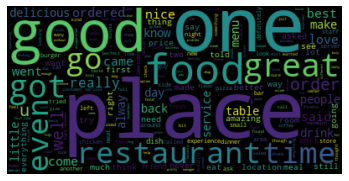

In [38]:
all_clean_pos = " ".join(review for review in df.clean)
wordcloud = WordCloud( background_color="black").generate(all_clean_pos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#stopwords to add: place, one, get got, said, came, really, go, restaurant, people

In [39]:
all_clean_pos = " ".join(review for review in df.clean)
wordcloud = WordCloud(stopwords = ['place', 'one', 'got', 'get'], background_color="black").generate(all_clean_pos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# stopwords to add: would, time, also, go, really, went, make, said, 

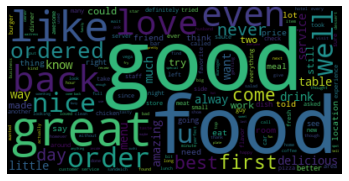

In [40]:
all_clean_pos = " ".join(review for review in df.clean)
wordcloud = WordCloud(stopwords = ['place', 'one', 'got', 'get', 'said', 'came', 'really', 'go',
                                  'restaurant', 'people', 'would', 'time', 'also', 'went',
                                  'make', 'said'], background_color="black").generate(all_clean_pos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#stopwords to add: place, one, get got, said, came, really, go, restaurant, people
#stopwords to add: would, time, also, go, really, went, make, said, 

In [41]:
clean_neg = df.loc[df.tag == 'neg']

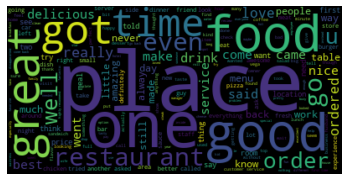

In [42]:
all_clean_neg = " ".join(review for review in df.clean)
wordcloud = WordCloud( background_color="black").generate(all_clean_neg)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#stopwords ot add: got,one, place, food, people, still, go , time, even, order, think, much, way, made

In [43]:
all_clean_neg = " ".join(review for review in df.clean)
wordcloud = WordCloud(stopwords = ['place', 'one', 'get', 'got', ],  background_color="black" ).generate(all_clean_neg)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#stopwords ot add: next, time, food, come, go, back, coming, time, 

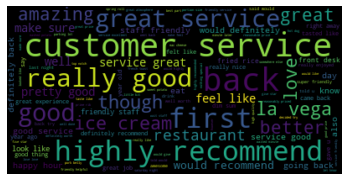

In [44]:
all_clean_neg = " ".join(review for review in df.clean)
wordcloud = WordCloud(stopwords = ['place', 'one', 'get', 'got', 'next', 
                                  'time', 'food', 'come', 'go', 'coming',
                                  'people', 'still', 'even', 'order', 'think',
                                  'much', 'way', 'may'],  background_color="black", collocation_threshold=3 ).generate(all_clean_neg)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#stopwords ot add: next, time, food, come, go, back, coming, time,
#stopwords ot add: got,one, place, food, people, still, go , time, even, order, think, much, way, made

# TF-IDF

In [45]:
df.head()

tag                                              clean
0  pos  oh happy day finally cane near casa yes others...
1  pos  twice nice laid back tried weekend southern me...
2  pos  order delivery reviewi discovered place front ...
3  pos  close friend town instead taking well establis...
4  pos  coconut fish cafe fantastic five star fish caf...

In [68]:
data = df['clean']
target = df['tag']
#separate features from target

In [69]:
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target,
                                                    random_state=42,
                                                    test_size=0.25)

In [70]:
# Secondary train-test split to build our best model
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train,
                                          test_size=0.25, random_state=42)

In [71]:
vectorizer = TfidfVectorizer(analyzer = 'word', ngram_range=(1,2))
#calculate the TF-IDF score for unigrams and bigrams in text

X_t_vec = vectorizer.fit_transform(X_t)
X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(vectorizer.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)

In [72]:
X_val_vec = vectorizer.transform(X_val)
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(vectorizer.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)

In [51]:
X_t_vec

aaa  aaa arizona  aaa assigns  aaa car  aaa enrique  aaa know  \
7128   0.0          0.0          0.0      0.0          0.0       0.0   
7530   0.0          0.0          0.0      0.0          0.0       0.0   
2154   0.0          0.0          0.0      0.0          0.0       0.0   
1443   0.0          0.0          0.0      0.0          0.0       0.0   
5954   0.0          0.0          0.0      0.0          0.0       0.0   
...    ...          ...          ...      ...          ...       ...   
10280  0.0          0.0          0.0      0.0          0.0       0.0   
7829   0.0          0.0          0.0      0.0          0.0       0.0   
10128  0.0          0.0          0.0      0.0          0.0       0.0   
6893   0.0          0.0          0.0      0.0          0.0       0.0   
9942   0.0          0.0          0.0      0.0          0.0       0.0   

       aaa listing  aaa membership  aaa suggested  aaa within  ...  zumba  \
7128           0.0             0.0            0.0         0.0  ...    0.0   
7530           0.0             0.0            0.0         0.0  ...    0.0   
2154           0.0             0.0            0.0         0.0  ...    0.0   
1443           0.0             0.0            0.0         0.0  ...    0.0   
5954           0.0             0.0            0.0         0.0  ...    0.0   
...            ...             ...            ...         ...  ...    ...   
10280          0.0             0.0            0.0         0.0  ...    0.0   
7829           0.0             0.0            0.0         0.0  ...    0.0   
10128          0.0             0.0            0.0         0.0  ...    0.0   
6893           0.0             0.0            0.0         0.0  ...    0.0   
9942           0.0             0.0            0.0         0.0  ...    0.0   

       zumba radio  zupas  zupas one  zuppa  zuppa cure  zur  zur verf  zuzu  \
7128           0.0    0.0        0.0    0.0         0.0  0.0       0.0   0.0   
7530           0.0    0.0        0.0    0.0         0.0  0.0       0.0   0.0   
2154           0.0    0.0        0.0    0.0         0.0  0.0       0.0   0.0   
1443           0.0    0.0        0.0    0.0         0.0  0.0       0.0   0.0   
5954           0.0    0.0        0.0    0.0         0.0  0.0       0.0   0.0   
...            ...    ...        ...    ...         ...  ...       ...   ...   
10280          0.0    0.0        0.0    0.0         0.0  0.0       0.0   0.0   
7829           0.0    0.0        0.0    0.0         0.0  0.0       0.0   0.0   
10128          0.0    0.0        0.0    0.0         0.0  0.0       0.0   0.0   
6893           0.0    0.0        0.0    0.0         0.0  0.0       0.0   0.0   
9942           0.0    0.0        0.0    0.0         0.0  0.0       0.0   0.0   

       zuzu ideally  
7128            0.0  
7530            0.0  
2154            0.0  
1443            0.0  
5954            0.0  
...             ...  
10280           0.0  
7829            0.0  
10128           0.0  
6893            0.0  
9942            0.0  

[5920 rows x 226502 columns]

In [66]:
#vectorizer.vocabulary_

# New Random State to inspect new tf-idf vocab

In [53]:
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train,
                                          test_size=0.25, random_state=1)

In [65]:
len(X_t), len(X_val), len(y_t), len(y_val)

(5920, 1974, 5920, 1974)

In [54]:
vectorizer = TfidfVectorizer(analyzer = 'word', ngram_range=(1,2))
#calculate the TF-IDF score for unigrams and bigrams in text

X_t_vec = vectorizer.fit_transform(X_t)
X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(vectorizer.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)

In [67]:
#vectorizer.vocabulary_

# Modeling Data

In [73]:
mnb = MultinomialNB()

mnb.fit(X_t_vec, y_t)

MultinomialNB()

In [74]:
len(X_t_vec), len(y_t)

(5920, 5920)

In [75]:
len(X_val_vec), len(y_val)

(1974, 1974)

In [76]:
y_hat = mnb.predict(X_val_vec)
accuracy_score(y_val, y_hat)

0.7218844984802432

In [77]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [78]:
confusion_matrix(y_val, y_hat)

array([[  10,  549],
       [   0, 1415]], dtype=int64)

In [79]:
def conf_matrix_plotter(model):
    fig, ax = plt.subplots()

    fig.suptitle(str(model))

    plot_confusion_matrix(model, X_t_vec, y_t, ax=ax, cmap="plasma");

In [80]:
%%time
# get accuracy of each model and compare, drop worst model/s for odd number of models
# rank models for wieght
# use enseble method for to create THe MEGARITHM


mnb = MultinomialNB()
mnb.fit(X_t_vec, y_t)
mnb_pred = mnb.predict(X_val_vec)
mnb_acc = accuracy_score(y_val, mnb_pred)
mnb_acc

Wall time: 9.96 s


0.7218844984802432

In [81]:
from sklearn.metrics import plot_confusion_matrix

In [82]:
conf_matrix_plotter(mnb)

In [83]:
#%%time

#gnb = GaussianNB()
#gnb.fit(X_t_vec, y_t)
#gnb_pred = gnb.predict(X_val_vec)
#gnb_acc = accuracy_score(y_val, gnb_pred)
#gnb_acc

In [84]:
%%time

mnb = MultinomialNB(alpha = .1, fit_prior = False)
mnb.fit(X_t_vec, y_t)
mnb_pred = mnb.predict(X_val_vec)
mnb_acc = accuracy_score(y_val, mnb_pred)
mnb_acc

Wall time: 9.97 s


0.89209726443769

In [91]:
%%time

bnb = BernoulliNB()
bnb.fit(X_t_vec, y_t)
bnb_pred = bnb.predict(X_val_vec)
#bnb.score(X_train, y_train), bnb.score(X_test, y_test)
bnb_acc = accuracy_score(y_val, bnb_pred)
bnb_acc

#conf_matrix_plotter(bnb)

Wall time: 10.1 s


0.7299898682877406

In [86]:
%%time

bnb = BernoulliNB(fit_prior = False)
bnb.fit(X_t_vec, y_t)
bnb_pred = bnb.predict(X_val_vec)
#bnb.score(X_train, y_train), bnb.score(X_test, y_test)
bnb_acc = accuracy_score(y_val, bnb_pred)
bnb_acc

Wall time: 10 s


0.7299898682877406

In [92]:
%%time

lr = LogisticRegression()
lr.fit(X_t_vec, y_t)
lr_pred = lr.predict(X_val_vec)
#lr.score(X_train, y_train), lr.score(X_test, y_test)
lr_acc = accuracy_score(y_val, lr_pred)
lr_acc

Wall time: 12.5 s


0.8789260385005065

In [93]:
%%time

lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_t_vec, y_t)
lr_pred = lr.predict(X_val_vec)
#lr.score(X_train, y_train), lr.score(X_test, y_test)
lr_acc = accuracy_score(y_val, lr_pred)
lr_acc

Wall time: 10.9 s


0.8789260385005065

# FSM

In [94]:
%%time

#    'loss': ['hinge', 'log', 'modified_huber', 'perceptron', 'huber', 'squared_loss'],
#    'penalty': ['l2', 'l1', 'elasticnet'],
#    'alpha': [0.0001, 0.001, 0.01, 0.1],    


sgd = SGDClassifier()
sgd.fit(X_t_vec, y_t)
sgd_pred = sgd.predict(X_val_vec)
#sgd.score(X_train, y_train), sgd.score(X_test, y_test)
sgd_acc = accuracy_score(y_val, sgd_pred)
sgd_acc

#conf_matrix_plotter(sgd)

Wall time: 10.5 s


0.9179331306990881

In [95]:
sgd = SGDClassifier()
sgd.fit(X_t_vec, y_t)
sgd_pred = sgd.predict(X_val_vec)
#sgd.score(X_train, y_train), sgd.score(X_test, y_test)
sgd_acc = accuracy_score(y_val, sgd_pred)
sgd_acc

0.9194528875379939

# Grid Search

In [96]:
from xgboost import XGBClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [97]:
lr = LogisticRegression()
mnb = MultinomialNB()
bnb = BernoulliNB()
knn =  KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
xgb = XGBClassifier()
sgd = SGDClassifier()

#lr_pipe = Pipeline(steps =[,('lr', LogisticRegression())])
#mnb_pipe = Pipeline(steps =[,('mnb', MultinomialNB())])
#bnb_pipe = Pipeline(steps =[,('bnb', BernoulliNB())])
#knn_pipe = Pipeline(steps =[,('knn', KNeighborsClassifier())])
#dtc_pipe = Pipeline(steps =[,('dtc', DecisionTreeClassifier())])
#rfc_pipe = Pipeline(steps =[,('rfc', RandomForestClassifier())])
#xgb_pipe = Pipeline(steps =[,('xgb', XGBClassifier())])
#sgd_pipe = Pipeline(steps =[,('sgd', SGDClassifier())])

In [98]:
##Logistic Regression Hyperparameters
lr_params = {
   'lr__C':[.1, .75],
   'lr__max_iter':[500],
   'lr__solver':['lbfgs', 'liblinear']
    
            }

##Multinomial Naive Bayes
mnb_params = {    
    'mnb__alpha': [1, .5, .1],
    'mnb__fit_prior': ['True', 'False']
}

##Bernoulli Naive Bayes Hyperparameters
bnb_params = {'bnb__alpha': list(np.linspace(.1, 1, 10))}

##K Nearest Neighbors
knn_params = {
    'knn__n_neighbors': [3, 7, 12], 
    'knn__weights':['uniform', 'distance'], 
    'knn__p':[1, 2, 3, 4]
             }

##Decision Tree
dtc_params = {
    'dtc__criterion':['gini', 'entropy'],  
    'dtc__max_depth': [10, 25, 40, 55],
    'dtc__min_samples_leaf':[1, 2, 3], 
    'dtc__max_features': ['auto', 'sqrt']
              } 

##Random Forest
rfc_params = {
    'rfc__n_estimators':[100, 125],
    'rfc__criterion':['gini', 'entropy'],
    'rfc__max_depth':[20, 40, None],
    'rfc__min_samples_leaf':[1, 2, 3], 
    'rfc__max_features': ['auto','sqrt', 'log2']
                }

##XGBoost
xgb_params = {
        'xgb__eta':[.7, .9, 1.1],
        'xgb__max_depth': [6, 10, 15, 20],
        'xgb__learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'xgb__subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'xgb__colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'xgb__colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'xgb__min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'xgb__gamma': [0, 0.25, 0.5, 1.0],
        'xgb__reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'xgb__n_estimators': [100, 120]
            }

##SGD Params
sgd_params ={
    'sgd__loss': ['hinge', 'log', 'modified_huber', 'perceptron', 'huber', 'squared_loss'],
    'sgd__penalty': ['l2', 'l1', 'elasticnet'],
    'sgd__alpha': [0.0001, 0.001, 0.01, 0.1],    
}

# Grid Search Test

In [151]:
#create smaller feature set to test if run time shortens
small_X_t_vec = X_t_vec.iloc[:, 0:100]

In [152]:
log_grid = GridSearchCV(estimator = LogisticRegression(), param_grid = lr_params, scoring = 'accuracy')
log_grid.fit(small_X_t_vec, y_t)
log_grid.best_params_

{'C': 0.75}

# Boost feature set to test gridsearch threshold

In [154]:
tenk_X_t_vec = X_t_vec.iloc[:, 0:10000]

In [155]:
log_grid = GridSearchCV(estimator = LogisticRegression(), param_grid = lr_params, scoring = 'accuracy')
log_grid.fit(tenk_X_t_vec, y_t)
log_grid.best_params_

{'C': 0.75}

In [100]:
from sklearn.pipeline import Pipeline

In [183]:
lr_pipe = Pipeline(steps =[('tf', TfidfVectorizer(max_features =50)),('lr', LogisticRegression())])

In [184]:
log_grid = GridSearchCV(estimator = lr_pipe, param_grid = lr_params, scoring = 'accuracy')
log_grid.fit(X_train, y_train)
log_grid.best_params_

{'lr__C': 0.75, 'lr__max_iter': 500, 'lr__solver': 'liblinear'}

In [187]:
len(log_grid.best_estimator_.named_steps['tf'].get_feature_names())

50

# instantiate piplines

In [101]:
lr_pipe = Pipeline(steps =[('tf', TfidfVectorizer()),('lr', LogisticRegression())])
mnb_pipe = Pipeline(steps =[('tf', TfidfVectorizer()),('mnb', MultinomialNB())])
bnb_pipe = Pipeline(steps =[('tf', TfidfVectorizer()),('bnb', BernoulliNB())])
knn_pipe = Pipeline(steps =[('tf', TfidfVectorizer()),('knn', KNeighborsClassifier())])
dtc_pipe = Pipeline(steps =[('tf', TfidfVectorizer()),('dtc', DecisionTreeClassifier())])
rfc_pipe = Pipeline(steps =[('tf', TfidfVectorizer()),('rfc', RandomForestClassifier())])
xgb_pipe = Pipeline(steps =[('tf', TfidfVectorizer()),('xgb', XGBClassifier())])
sgd_pipe = Pipeline(steps =[('tf', TfidfVectorizer()),('sgd', SGDClassifier())])

In [102]:
log_grid = GridSearchCV(estimator = lr_pipe, param_grid = lr_params, scoring = 'accuracy')
log_grid.fit(X_train, y_train)
log_grid.best_params_

{'lr__C': 0.75, 'lr__max_iter': 500, 'lr__solver': 'liblinear'}

In [103]:
mnb_grid = GridSearchCV(estimator = mnb_pipe, param_grid = mnb_params, scoring = 'accuracy')
mnb_grid.fit(X_train, y_train)
mnb_grid.best_params_

{'mnb__alpha': 0.1, 'mnb__fit_prior': 'True'}

In [104]:
mnb.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [105]:
bnb_grid = GridSearchCV(estimator = bnb_pipe, param_grid = bnb_params, scoring = 'accuracy')
bnb_grid.fit(X_train, y_train)
bnb_grid.best_params_

{'bnb__alpha': 0.1}

In [106]:
knn_grid = GridSearchCV(estimator = knn_pipe, param_grid = knn_params, scoring = 'accuracy')
knn_grid.fit(X_train, y_train)
knn_grid.best_params_

C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 419, in _fit
    raise ValueError("Metric '%s' not valid for sparse input. "
ValueError: Metric 'minkowski' not valid for spa

C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 419, in _fit
    raise ValueError("Metric '%s' not valid for sparse input. "
ValueError: Metric 'minkowski' not valid for spa

C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 419, in _fit
    raise ValueError("Metric '%s' not valid for sparse input. "
ValueError: Metric 'minkowski' not valid for spa

C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 419, in _fit
    raise ValueError("Metric '%s' not valid for sparse input. "
ValueError: Metric 'minkowski' not valid for spa

C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 419, in _fit
    raise ValueError("Metric '%s' not valid for sparse input. "
ValueError: Metric 'minkowski' not valid for spa

C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 419, in _fit
    raise ValueError("Metric '%s' not valid for sparse input. "
ValueError: Metric 'minkowski' not valid for spa

C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 419, in _fit
    raise ValueError("Metric '%s' not valid for sparse input. "
ValueError: Metric 'minkowski' not valid for spa

C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 419, in _fit
    raise ValueError("Metric '%s' not valid for sparse input. "
ValueError: Metric 'minkowski' not valid for spa

C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 419, in _fit
    raise ValueError("Metric '%s' not valid for sparse input. "
ValueError: Metric 'minkowski' not valid for spa

{'knn__n_neighbors': 12, 'knn__p': 2, 'knn__weights': 'uniform'}

In [107]:
dtc_grid = GridSearchCV(estimator = dtc_pipe, param_grid = dtc_params, scoring = 'accuracy')
dtc_grid.fit(X_train, y_train)
dtc_grid.best_params_

{'dtc__criterion': 'entropy',
 'dtc__max_depth': 40,
 'dtc__max_features': 'sqrt',
 'dtc__min_samples_leaf': 3}

In [108]:
rfc_grid = GridSearchCV(estimator = rfc_pipe, param_grid = rfc_params, scoring = 'accuracy')
rfc_grid.fit(X_train, y_train)
rfc_grid.best_params_

{'rfc__criterion': 'gini',
 'rfc__max_depth': None,
 'rfc__max_features': 'sqrt',
 'rfc__min_samples_leaf': 1,
 'rfc__n_estimators': 100}

In [331]:
xgb_grid = GridSearchCV(estimator = xgb_pipe, param_grid = xgb_params, scoring = 'accuracy')
xgb_grid.fit(X_train, y_train)
xgb_grid.best_params_

KeyboardInterrupt: 

In [109]:
sgd_grid = GridSearchCV(estimator = sgd_pipe, param_grid = sgd_params, scoring = 'accuracy')
sgd_grid.fit(X_train, y_train)
sgd_grid.best_params_

C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\edwardsrk\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_stochastic_gradient

{'sgd__alpha': 0.0001, 'sgd__loss': 'hinge', 'sgd__penalty': 'elasticnet'}

# Tuned models

In [110]:
lr_pipe_tuned = Pipeline(steps =[('tf', TfidfVectorizer()),
                                 ('lr', LogisticRegression(C = 0.75, max_iter = 500, solver = 'liblinear'))])
#{'lr__C': 0.75, 'lr__max_iter': 500, 'lr__solver': 'liblinear'}
mnb_pipe_tuned = Pipeline(steps =[('tf', TfidfVectorizer()),
                                  ('mnb', MultinomialNB(alpha = 1, fit_prior = True))])
#{'mnb__alpha': 1, 'mnb__fit_prior': 'True'}
bnb_pipe_tuned = Pipeline(steps =[('tf', TfidfVectorizer()),
                                  ('bnb', BernoulliNB(alpha = 0.1))])
#{'bnb__alpha': 0.1}
knn_pipe_tuned = Pipeline(steps =[('tf', TfidfVectorizer()),('knn', KNeighborsClassifier())])
#{'knn__n_neighbors': 12, 'knn__p': 2, 'knn__weights': 'uniform'}

dtc_pipe_tuned = Pipeline(steps =[('tf', TfidfVectorizer()),
                                  ('dtc', DecisionTreeClassifier(criterion = 'entropy', max_depth = 40, max_features = 'sqrt',
                                                                 min_samples_leaf = 3))])
#{'dtc__criterion': 'entropy', 'dtc__max_depth': 40,'dtc__max_features': 'sqrt', 'dtc__min_samples_leaf': 3}

rfc_pipe_tuned = Pipeline(steps =[('tf', TfidfVectorizer()),
                                  ('rfc', RandomForestClassifier(criterion = 'gini', max_depth = None, max_features = 'sqrt',
                                                                min_samples_leaf = 1, n_estimators = 100))])
#{'rfc__criterion': 'gini','rfc__max_depth': None, 'rfc__max_features': 'sqrt','rfc__min_samples_leaf': 1,'rfc__n_estimators': 100}

xgb_pipe_tuned = Pipeline(steps =[('tf', TfidfVectorizer()),('xgb', XGBClassifier())])

sgd_pipe_tuned = Pipeline(steps =[('tf', TfidfVectorizer()),
                                  ('sgd', SGDClassifier(alpha = 0.0001, loss = 'hinge', penalty = 'elasticnet'))])
#{'sgd__alpha': 0.0001, 'sgd__loss': 'hinge', 'sgd__penalty': 'elasticnet'}

In [111]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV

In [112]:
lr_pipe_tuned.fit(X_train, y_train);
plot_confusion_matrix(lr_pipe_tuned, X_train, y_train); 
print("Mean Accuracy:", cross_val_score(lr_pipe_tuned, X_train, y_train).mean())

Mean Accuracy: 0.9018248060932823


In [113]:
mnb_pipe_tuned.fit(X_train, y_train);
plot_confusion_matrix(mnb_pipe_tuned, X_train, y_train); 
print("Mean Accuracy:", cross_val_score(mnb_pipe_tuned, X_train, y_train).mean())

Mean Accuracy: 0.7804669333159955


Mean Accuracy: 0.8615407707787011


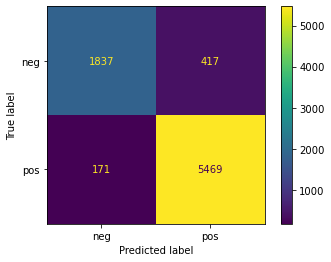

In [114]:
bnb_pipe_tuned.fit(X_train, y_train);
plot_confusion_matrix(bnb_pipe_tuned, X_train, y_train);
print("Mean Accuracy:", cross_val_score(bnb_pipe_tuned, X_train, y_train).mean())

Mean Accuracy: 0.747525707740456


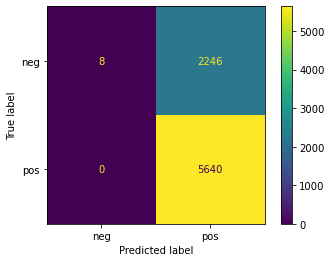

In [115]:
knn_pipe_tuned.fit(X_train, y_train);
plot_confusion_matrix(knn_pipe_tuned, X_train, y_train);
print("Mean Accuracy:", cross_val_score(knn_pipe_tuned, X_train, y_train).mean())

In [116]:
dtc_pipe_tuned.fit(X_train, y_train);
plot_confusion_matrix(dtc_pipe_tuned, X_train, y_train);
print("Mean Accuracy:", cross_val_score(dtc_pipe_tuned, X_train, y_train).mean())

Mean Accuracy: 0.760450735292347


Mean Accuracy: 0.8777557309137436


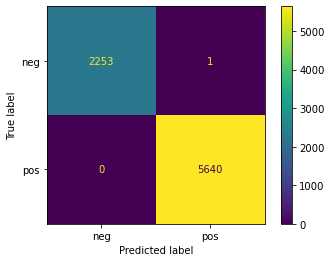

In [117]:
rfc_pipe_tuned.fit(X_train, y_train);
plot_confusion_matrix(rfc_pipe_tuned, X_train, y_train);
print("Mean Accuracy:", cross_val_score(rfc_pipe_tuned, X_train, y_train).mean())

Mean Accuracy: 0.9070186084629455


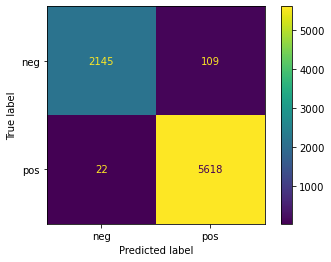

In [118]:
xgb_pipe_tuned.fit(X_train, y_train);
plot_confusion_matrix(xgb_pipe_tuned, X_train, y_train);
print("Mean Accuracy:", cross_val_score(xgb_pipe_tuned, X_train, y_train).mean())

In [119]:
sgd_pipe_tuned.fit(X_train, y_train);
plot_confusion_matrix(sgd_pipe_tuned, X_train, y_train);
print("Mean Accuracy:", cross_val_score(sgd_pipe_tuned, X_train, y_train).mean())

Mean Accuracy: 0.9242470286900872


# Vectorizer tuning

## Start with best three performing models, test diffreent number of features while looking for the smallest amount necessary.
## compare with 1000, 5000, 10000, 50000, 75000 feaures

In [120]:
lr_pipe_tuned = Pipeline(steps =[('tf', TfidfVectorizer(max_features = 1000)),
                                 ('lr', LogisticRegression(C = 0.75, max_iter = 500, solver = 'liblinear'))])
#Mean Accuracy: 0.8883250277592716

xgb_pipe_tuned = Pipeline(steps =[('tf', TfidfVectorizer(max_features = 1000)),('xgb', XGBClassifier())])
#Mean Accuracy: 0.8706019986675549

sgd_pipe_tuned = Pipeline(steps =[('tf', TfidfVectorizer(max_features = 1000)),
                                  ('sgd', SGDClassifier(alpha = 0.001, loss = 'modified_huber', penalty = 'L2'))])
#Mean Accuracy: 0.8965872529424829

Feature tracker chart

In [121]:

#1000, 5000, 10000, 50000, 75000

#1000:
#lr:Mean Accuracy: 0.8841932933599821
#xgb:Mean Accuracy: 0.8592737286253609
#sgd:Mean Accuracy: 0.8859269820119919

#5000:
#lr:Mean Accuracy: 0.8921896513435488
#xgb:Mean Accuracy: 0.8678034199422606
#sgd:Mean Accuracy: 0.8968536531201423

#10000:
#lr:Mean Accuracy: 0.8903240506329114
#xgb:Mean Accuracy: 0.8710026204752388
#sgd:Mean Accuracy: 0.8965873417721518

#50000:
#lr:Mean Accuracy: 0.8883250277592716
#xgb:Mean Accuracy: 0.8706019986675549
#sgd:Mean Accuracy: 0.8961875194314901

#75000:
#lr:Mean Accuracy: 0.8883250277592716
#xgb:Mean Accuracy: 0.8706019986675549
#sgd:Mean Accuracy: 0.8960541860981568


In [122]:
sgd_pipe_tuned.fit(X_train, y_train);
plot_confusion_matrix(sgd_pipe_tuned, X_train, y_train);
print("Mean Accuracy:", cross_val_score(sgd_pipe_tuned, X_train, y_train).mean())

Mean Accuracy: 0.9131002519603382


In [123]:
xgb_pipe_tuned.fit(X_train, y_train);
plot_confusion_matrix(xgb_pipe_tuned, X_train, y_train);
print("Mean Accuracy:", cross_val_score(xgb_pipe_tuned, X_train, y_train).mean())

Mean Accuracy: 0.8977709657248856


Mean Accuracy: 0.9068921065537783


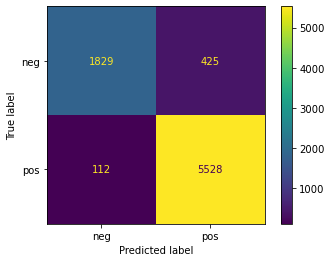

In [124]:
lr_pipe_tuned.fit(X_train, y_train);
plot_confusion_matrix(lr_pipe_tuned, X_train, y_train); 
print("Mean Accuracy:", cross_val_score(lr_pipe_tuned, X_train, y_train).mean())

Vectorizer tuning: other hyper parameters

Logistic Regression

In [125]:
lr_pipe_tuned = Pipeline(steps =[('tf', TfidfVectorizer(analyzer = 'word', max_features = 1000)),
                                 ('lr', LogisticRegression(C = 0.75, max_iter = 500, solver = 'liblinear'))])

In [126]:
tf_params = {
    'tf__max_df': (0.25, 0.5, 0.75),
    'tf__ngram_range': [(1, 1), (1, 2), (1, 3)],
}

In [127]:
log_grid = GridSearchCV(estimator = lr_pipe_tuned, param_grid = tf_params, scoring = 'accuracy')
log_grid.fit(X_train, y_train)
log_grid.best_params_

{'tf__max_df': 0.5, 'tf__ngram_range': (1, 1)}

In [128]:
lr_pipe_tuned = Pipeline(steps =[('tf', TfidfVectorizer(analyzer = 'word',max_df = 0.5, ngram_range = (1,1), max_features = 1000)),
                                 ('lr', LogisticRegression(C = 0.75, max_iter = 500, solver = 'liblinear'))])

Mean Accuracy: 0.9068921065537783


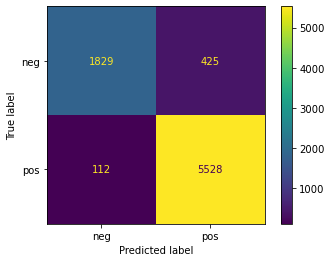

In [129]:
lr_pipe_tuned.fit(X_train, y_train);
plot_confusion_matrix(lr_pipe_tuned, X_train, y_train); 
print("Mean Accuracy:", cross_val_score(lr_pipe_tuned, X_train, y_train).mean())

XGB

In [130]:
xgb_pipe_tuned = Pipeline(steps =[('tf', TfidfVectorizer(analyzer = 'word', max_features = 1000)),('xgb', XGBClassifier())])

In [131]:
xgb_grid = GridSearchCV(estimator = xgb_pipe_tuned, param_grid = tf_params, scoring = 'accuracy')
xgb_grid.fit(X_train, y_train)
xgb_grid.best_params_

{'tf__max_df': 0.5, 'tf__ngram_range': (1, 2)}

In [319]:
xgb_pipe_tuned = Pipeline(steps =[('tf', TfidfVectorizer(analyzer = 'word',max_df = 0.5, 
                                                         ngram_range = (1,2), max_features = 1000)),('xgb', XGBClassifier())])

Mean Accuracy: 0.8977709657248856


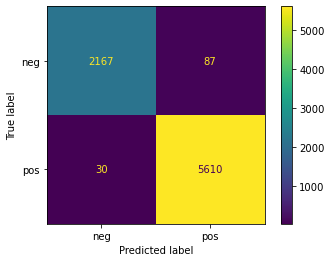

In [132]:
xgb_pipe_tuned.fit(X_train, y_train);
plot_confusion_matrix(xgb_pipe_tuned, X_train, y_train);
print("Mean Accuracy:", cross_val_score(xgb_pipe_tuned, X_train, y_train).mean())

SGD

In [133]:
sgd_pipe_tuned = Pipeline(steps =[('tf', TfidfVectorizer(max_features = 1000)),
                                  ('sgd', SGDClassifier(alpha = 0.001, loss = 'modified_huber', penalty = 'L2'))])

In [134]:
sgd_grid = GridSearchCV(estimator = sgd_pipe, param_grid = tf_params, scoring = 'accuracy')
sgd_grid.fit(X_train, y_train)
sgd_grid.best_params_

{'tf__max_df': 0.5, 'tf__ngram_range': (1, 2)}

In [135]:
sgd_pipe_tuned = Pipeline(steps =[('tf', TfidfVectorizer(max_df = 0.5, ngram_range = (1,2), max_features = 1000)),
                                  ('sgd', SGDClassifier(alpha = 0.001, loss = 'modified_huber', penalty = 'L2'))])

In [136]:
sgd_pipe_tuned.fit(X_train, y_train);
plot_confusion_matrix(sgd_pipe_tuned, X_train, y_train);
print("Mean Accuracy:", cross_val_score(sgd_pipe_tuned, X_train, y_train).mean())

Mean Accuracy: 0.9143666356030632
